In [1]:
# GAN(Generative Adversarial Network)
# 적대적 생성 모델
# 생성 모델 : 데이터의 형태를 만들어 내는 모델, 어떤 분포 혹은 분산 자체를 만들어내는 모델
# 적대적 : 지폐위조범(Generator)과 경찰(Discriminator)
# Generator: 새로운 데이터의 형태를 만들어 내는 모델, 판독모델을 틀리도록 하는 역할(적대적 모델), 진짜 같은 가짜를 생성해내는 모델
# Discriminator: 데이터 판독 모델(Real, Fake 판독)

In [1]:
import torch
import random
# real 이미지 생성 함수
def generate_real():
    real_data = torch.FloatTensor(
    [random.uniform(0.8, 1.0),
    random.uniform(0.0, 0.2),
    random.uniform(0.8, 1.0),
    random.uniform(0.0, 0.2)])
    return real_data

In [2]:
# random 이미지 생성 함수
def generate_random(size):
    random_data = torch.rand(size)
    return random_data

In [3]:
import torch.nn as nn
import pandas as pd
# 판별모형
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
        nn.Linear(4, 3),
        nn.Sigmoid(),
        nn.Linear(3, 1),
        nn.Sigmoid()
        )
        self.loss_function = nn.MSELoss()
        self.optimiser = torch.optim.SGD(self.parameters(),
        lr=0.01)
        self.counter = 0
        self.progress = []
    def forward(self, inputs):
        return self.model(inputs)
    def train(self, inputs, targets):
        outputs = self.forward(inputs)
        loss = self.loss_function(outputs, targets)
        self.counter += 1
        if self.counter % 10 == 0:
            self.progress.append(loss.item())
        if self.counter % 10000 == 0:
            print("counter = ", self.counter)
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

In [4]:
D = Discriminator()
for i in range(10000):
    # real image
    D.train(generate_real(), torch.FloatTensor([1.0]))
    # fake image
    D.train(generate_random(4),torch.FloatTensor([0.0]))

counter =  10000
counter =  20000


In [5]:
print( D.forward( generate_real() ).item() )
print( D.forward( generate_random(4) ).item() )

0.7079265117645264
0.3606431186199188


In [6]:
# 생성모형
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
        nn.Linear(1, 3),
        nn.Sigmoid(),
        nn.Linear(3, 4),
        nn.Sigmoid()
        )
        self.optimiser = torch.optim.SGD(self.parameters(),
        lr=0.01)
        self.counter = 0
        self.progress = []
    def forward(self, inputs):
        return self.model(inputs)
    def train(self, D, inputs, targets):
        g_output = self.forward(inputs)
        d_output = D.forward(g_output)
        loss = D.loss_function(d_output, targets)
        self.counter += 1
        if self.counter % 10 == 0:
            self.progress.append(loss.item())
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

In [7]:
G = Generator()
G.forward(torch.FloatTensor([0.5]))

tensor([0.3447, 0.2982, 0.5260, 0.3768], grad_fn=<SigmoidBackward0>)

In [8]:
D = Discriminator()
G = Generator()
image_list = []
for i in range(10000):
    D.train(generate_real(), torch.FloatTensor([1.0]))
    # 판별모형 학습(false)
    D.train(G.forward(torch.FloatTensor([0.5])).detach(),
    torch.FloatTensor([0.0]))
    # 생성모형 학습
    G.train(D, torch.FloatTensor([0.5]),
    torch.FloatTensor([1.0]))
    if i % 1000 == 0:
        image_list.append(
        G.forward(torch.FloatTensor([0.5])).detach().numpy() )

counter =  10000
counter =  20000


In [9]:
G.forward(torch.FloatTensor([0.5]))

tensor([0.8547, 0.1775, 0.8556, 0.1483], grad_fn=<SigmoidBackward0>)

In [10]:
# 생성된 패턴
image_list

[array([0.4908064 , 0.38554907, 0.4196665 , 0.57700944], dtype=float32),
 array([0.48956254, 0.38375023, 0.41814366, 0.57824475], dtype=float32),
 array([0.4919107 , 0.38437113, 0.4196748 , 0.57976174], dtype=float32),
 array([0.4978104 , 0.38642922, 0.42571458, 0.5821701 ], dtype=float32),
 array([0.5093575 , 0.38971177, 0.43838722, 0.5844125 ], dtype=float32),
 array([0.5307704 , 0.39302737, 0.46253914, 0.5831161 ], dtype=float32),
 array([0.5688935 , 0.3921187 , 0.50734895, 0.5693837 ], dtype=float32),
 array([0.6308128 , 0.37631434, 0.58424735, 0.5224265 ], dtype=float32),
 array([0.7132681 , 0.33032456, 0.6893455 , 0.41132954], dtype=float32),
 array([0.7943974 , 0.25400063, 0.78809667, 0.25766206], dtype=float32)]

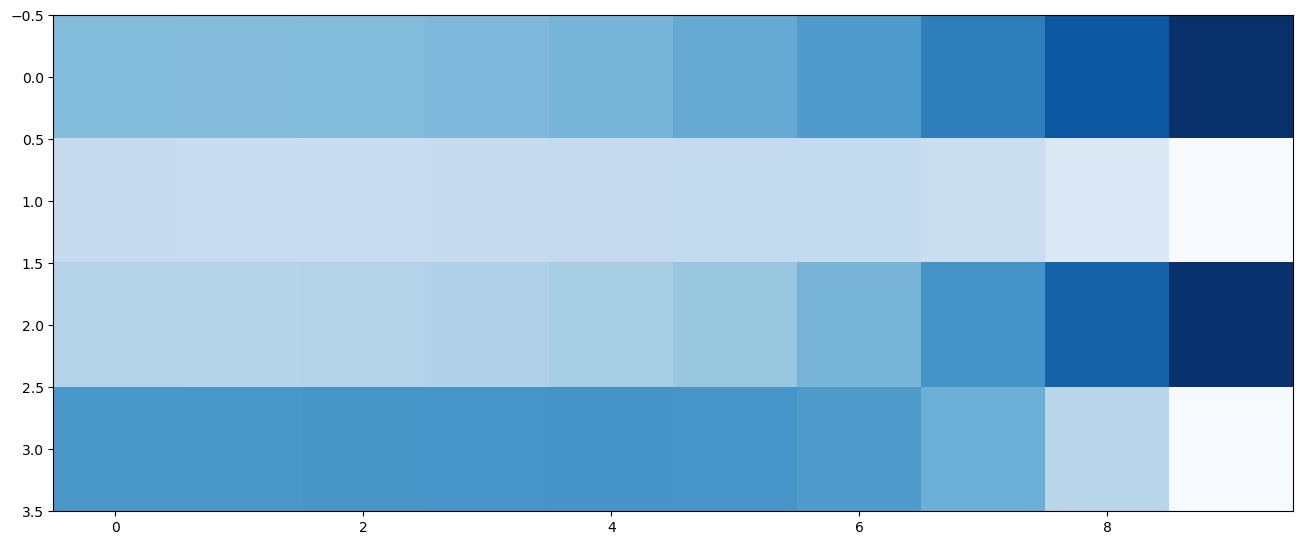

In [11]:
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import numpy as np
plt.figure(figsize = (16,8))
plt.imshow(np.array(image_list).T, interpolation='none',
cmap='Blues')
plt.show()